# Análisis de Tipos de Artículos: Mapping Review IA y ML en Educación Matemática K-12

**MQ3: ¿Qué tipos de artículos se publican en este campo?**

Este notebook analiza la distribución y características de diferentes tipos de publicaciones en el campo de IA y ML en educación matemática K-12.

## 1. Configuración del Entorno

In [2]:
# Instalación de dependencias
!pip install pandas numpy matplotlib seaborn plotly

In [3]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## 2. Carga de Datos desde GitHub

In [4]:
# Cargar el dataset desde GitHub
url = "https://raw.githubusercontent.com/mlproyecto/doctorado/main/MappingReview.csv"
df = pd.read_csv(url, sep=';', encoding='latin-1')

print(f"Dataset cargado: {df.shape[0]} filas y {df.shape[1]} columnas")
print("\nPrimeras 5 filas:")
df.head()

Dataset cargado: 89 filas y 8 columnas

Primeras 5 filas:


,Title,Author(s),Year,Publication Title,Type of Publication,Source,DOI,Abstract
0,What Would the Matrix Do?: A Systematic Review of K-12 AI Learning Contexts and Learner-Interface Interactions,"Moore, Robert L.; Jiang, Shiyan; Abramowitz, Brian",2023,Journal of Research on Technology in Education,Article,Eric,https://doi.org/10.1080/15391523.2022.2148785,"This systematic review examines the empirical literature published between 2014 and 2021 that situates artificial intelligence within K-12 educational contexts. Our review synthesizes 12 articles and highlights artificial intelligence's instructional contexts and applications in K-12 learning environments. We focused our synThesis on the learning contexts and the learner-interface interactions. Our findings highlight that most of intelligent systems are being deployed in math or informal settings. Also, there are opportunities for more collaboration to facilitate teaching and learning in domain-specific areas. Additionally, researchers can explore how to implement more collaborative learning opportunities between intelligent tutors and learners. We conclude with a discussion of the reciprocal nature of this technology integration."
1,ML4STEM Professional Development Program: Enriching K-12 STEM Teaching with Machine Learning,"Tang, Jingwan; Zhou, Xiaofei; Wan, Xiaoyu; Daley, Michael; Bai, Zhen",2023,International Journal of Artificial Intelligence in Education,Article,Eric,https://www.doi.org/10.1007/s40593-022-00292-4,"The advances of machine learning (ML) in scientific discovery (SD) reveal exciting opportunities to utilize it as a cross-cutting tool for inquiry-based learning in K-12 STEM classrooms. There are, however, limited efforts on providing teachers with sufficient knowledge and skills to integrate ML into teaching. Our study addresses this gap by proposing a professional development (PD) program named ML4STEM. Based on existing research on supporting teacher learning in innovative technology integration, ML4STEM is composed of Teachers-as-Learners and Teachers-as-Designers sessions. It integrates an accessible ML learning platform designed for students with limited math and computing skills. We implemented this PD program and evaluated its effectiveness with 18 K-12 STEM teachers. Findings confirm that ML4STEM successfully develops teachers' understanding of teaching STEM with ML as well as fosters positive attitudes toward applying the ML as an in-class teaching technology. Discussions on the implications of our findings from ML4STEM are provided for future PD researchers and designers."
2,Integrating Machine Learning in Mathematics Classrooms,"Jones, Joshua",2021,Mathematics Teacher: Learning and Teaching PK-12,Article,Eric,https://doi.org/10.5951/MTLT.2021.0001,"Aside from being culturally relevant, artificial intelligence is also supporting companies in making business decisions. Consequently, ""workforce needs have shifted rapidly,"" resulting in a demand for applicants who are skilled in ""data, analytics, machine learning, and artificial intelligence"" (Miller and Hughes 2017). This article contributes to filling that need by exploring a lesson in which students learned how conditional probability is the crux of many machine learning algorithms, including predictive text applications. Prior to this lesson, students learned how to calculate conditional probability. Most students had also demonstrated that they were able to calculate experimental probabilities on the basis of a Venn diagram, on a word problem, and on a two-way table. The activity described in this article satisfies Common Core State Standard CCSS.MATH.CONTENT.HSS. CP.A.5."
3,"Personalized Online Learning, Test Fairness, and Educational Measurement: Considering Differential Content Exposure Prior to a High Stakes End of Course Exam","Katz, Daniel; Huggins-Manley, Anne Corinne; Leite, Walter",2022,Applied Measurement in Education,Article,Eric,https://doi.org/10.1080/08957347.2022.2034824,"Accor

## 3. Análisis de Tipos de Artículos (MQ3)

In [5]:
# Análisis de tipos de publicación
type_counts = df['Type of Publication'].value_counts()
type_percentages = (type_counts / len(df)) * 100

print("=== DISTRIBUCIÓN DE TIPOS DE PUBLICACIÓN ===")
for pub_type, count in type_counts.items():
    percentage = type_percentages[pub_type]
    print(f"{pub_type}: {count} publicaciones ({percentage:.1f}%)")

print(f"\nTotal de tipos únicos: {len(type_counts)}")
print(f"Tipo más común: {type_counts.index[0]} ({type_counts.iloc[0]} publicaciones)")

=== DISTRIBUCIÓN DE TIPOS DE PUBLICACIÓN ===
Article: 52 publicaciones (58.4%)
Conference: 33 publicaciones (37.1%)
Book chapter: 4 publicaciones (4.5%)

Total de tipos únicos: 3
Tipo más común: Article (52 publicaciones)


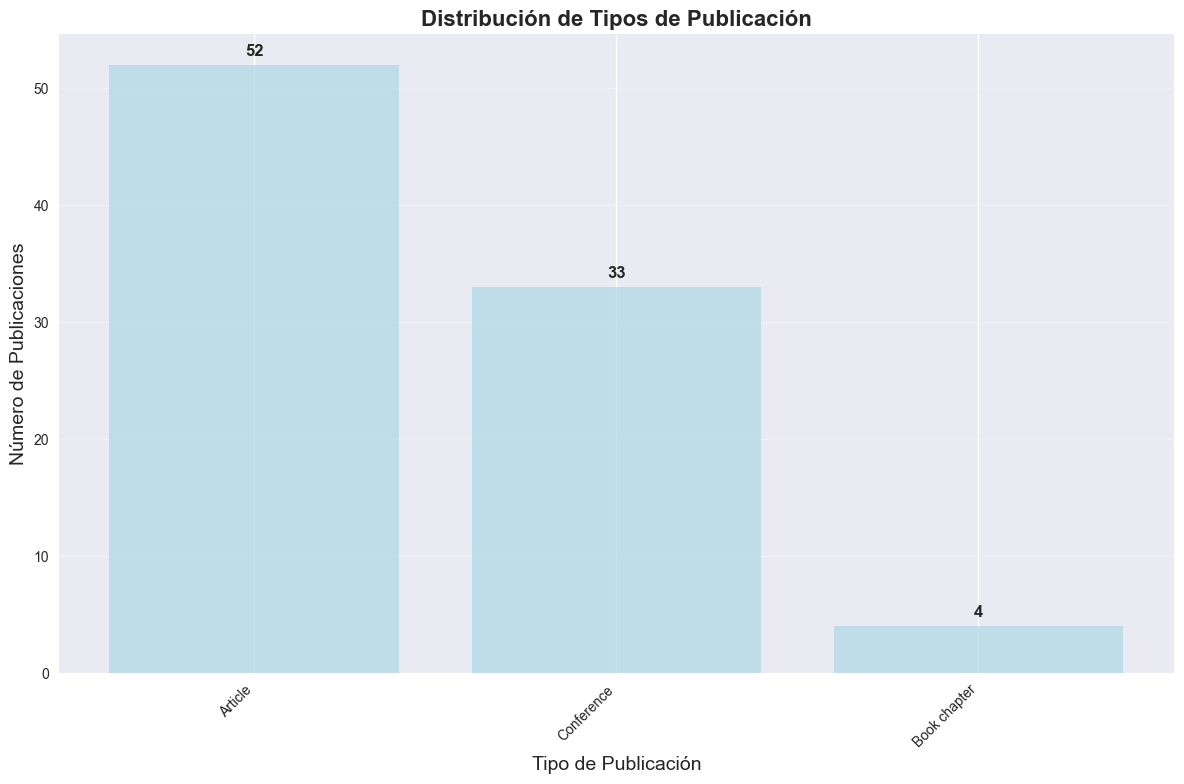

In [6]:
# Gráfico de barras para tipos de publicación
plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(type_counts)), type_counts.values, color='lightblue', alpha=0.7)
plt.xlabel('Tipo de Publicación', fontsize=14)
plt.ylabel('Número de Publicaciones', fontsize=14)
plt.title('Distribución de Tipos de Publicación', fontsize=16, fontweight='bold')
plt.xticks(range(len(type_counts)), type_counts.index, rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Agregar valores en las barras
for i, (bar, count) in enumerate(zip(bars, type_counts.values)):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

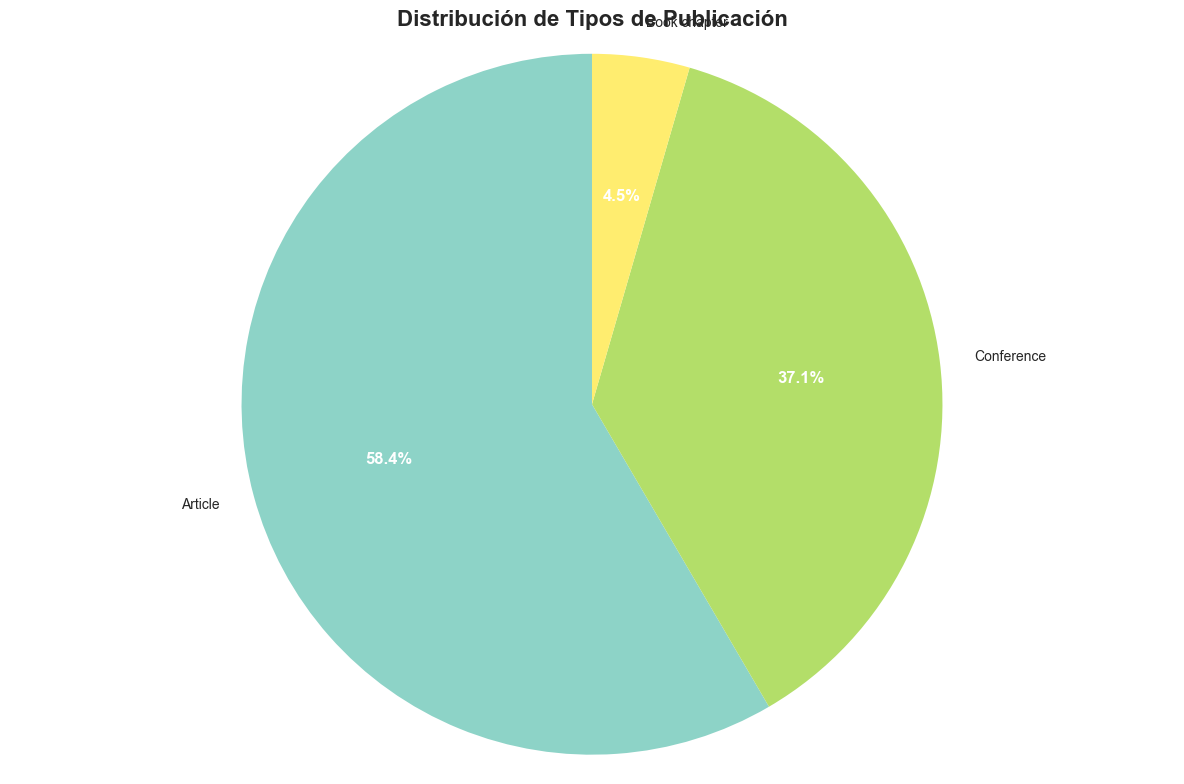

In [7]:
# Gráfico de pastel
plt.figure(figsize=(12, 8))
colors = plt.cm.Set3(np.linspace(0, 1, len(type_counts)))

wedges, texts, autotexts = plt.pie(type_counts.values, labels=type_counts.index, 
                                    autopct='%1.1f%%', colors=colors, startangle=90)

plt.title('Distribución de Tipos de Publicación', fontsize=16, fontweight='bold')
plt.axis('equal')

# Mejorar la legibilidad de las etiquetas
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

In [8]:
# Gráfico interactivo con Plotly
fig = px.pie(values=type_counts.values, names=type_counts.index,
              title='Distribución de Tipos de Publicación')

fig.update_layout(
    title_font_size=16
)

fig.show()

## 4. Análisis Temporal por Tipo

=== EVOLUCIÓN TEMPORAL POR TIPO DE PUBLICACIÓN ===
Type of Publication  Article  Book chapter  Conference
Year                                                  
2020                       3             0           1
2021                       3             0           3
2022                       7             2           5
2023                       8             1           5
2024                      20             1          14
2025                      11             0           5


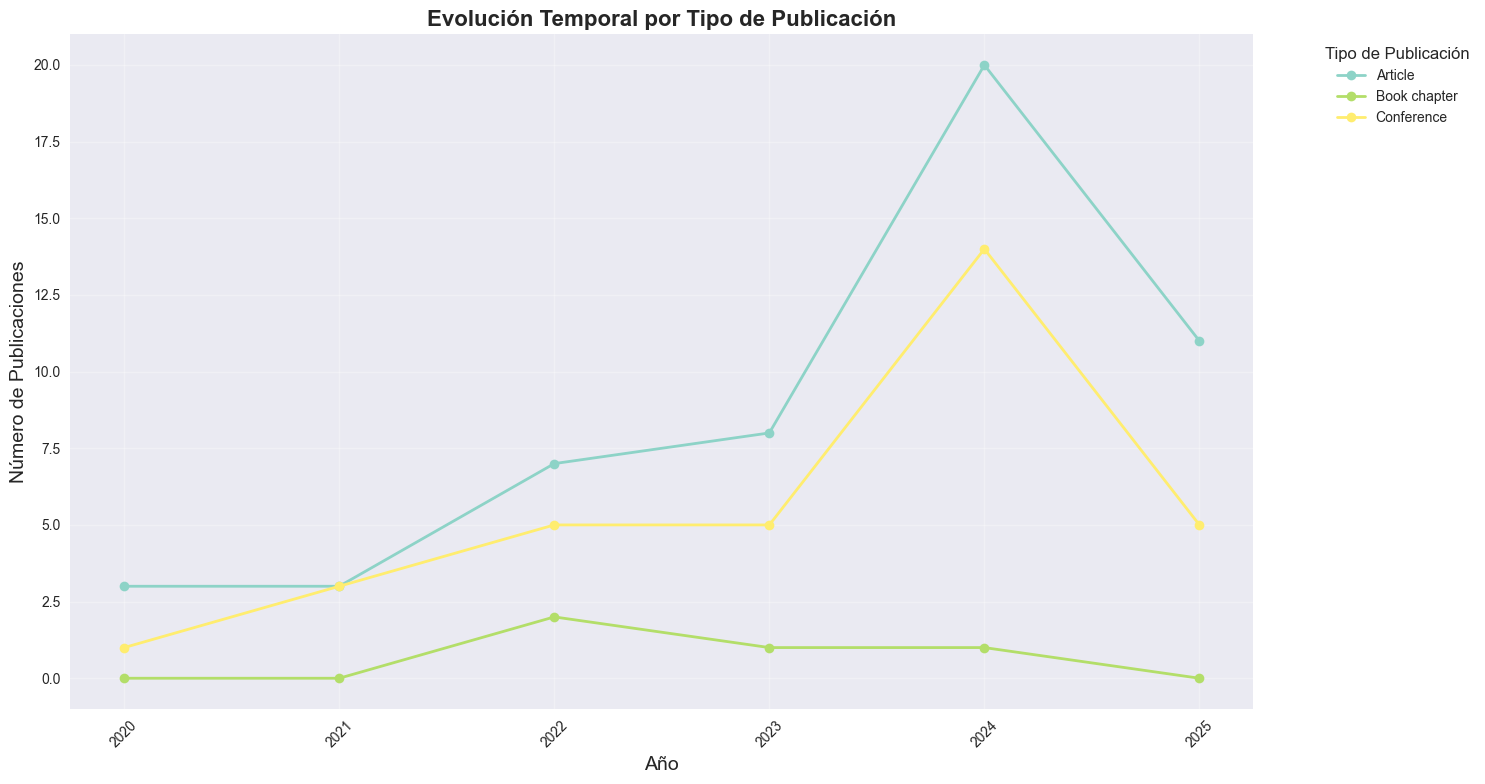

In [9]:
# Convertir Year a numérico
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Análisis temporal por tipo de publicación
temporal_by_type = df.groupby(['Year', 'Type of Publication']).size().unstack(fill_value=0)

print("=== EVOLUCIÓN TEMPORAL POR TIPO DE PUBLICACIÓN ===")
print(temporal_by_type)

# Gráfico de líneas temporal
plt.figure(figsize=(15, 8))
colors = plt.cm.Set3(np.linspace(0, 1, len(temporal_by_type.columns)))

for i, pub_type in enumerate(temporal_by_type.columns):
    plt.plot(temporal_by_type.index, temporal_by_type[pub_type], marker='o', linewidth=2, 
             label=pub_type, color=colors[i])

plt.title('Evolución Temporal por Tipo de Publicación', fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Publicaciones', fontsize=14)
plt.legend(title='Tipo de Publicación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Gráfico de área apilada
fig = px.area(temporal_by_type, title='Evolución Temporal por Tipo de Publicación')

fig.update_layout(
    title_font_size=16,
    xaxis_title='Año',
    yaxis_title='Número de Publicaciones',
    hovermode='x unified'
)

fig.show()

## 5. Análisis de Fuentes por Tipo

=== FUENTES POR TIPO DE PUBLICACIÓN ===
Source               Eric  IEEE  Scopus  WoS
Type of Publication                         
Article                18     0      13   21
Book chapter            0     0       4    0
Conference              0     6      27    0


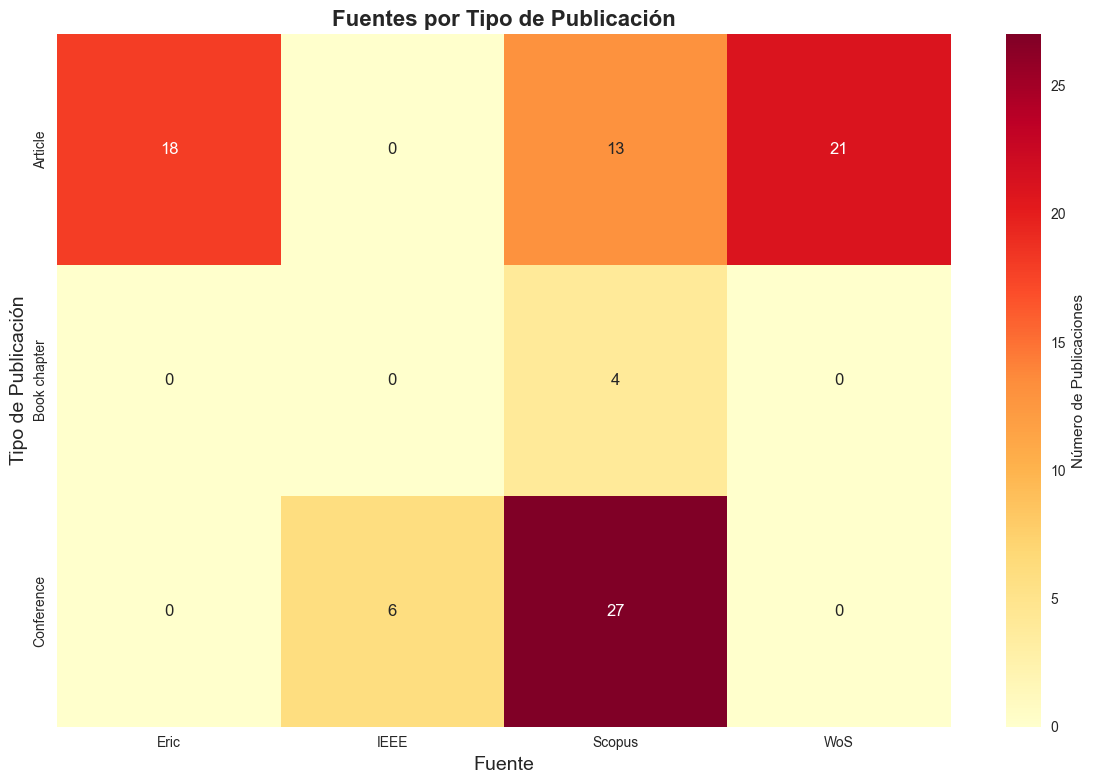

In [11]:
# Análisis de fuentes por tipo de publicación
source_by_type = df.groupby(['Type of Publication', 'Source']).size().unstack(fill_value=0)

print("=== FUENTES POR TIPO DE PUBLICACIÓN ===")
print(source_by_type)

# Gráfico de calor
plt.figure(figsize=(12, 8))
sns.heatmap(source_by_type, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Número de Publicaciones'})
plt.title('Fuentes por Tipo de Publicación', fontsize=16, fontweight='bold')
plt.xlabel('Fuente', fontsize=14)
plt.ylabel('Tipo de Publicación', fontsize=14)
plt.tight_layout()
plt.show()

## 6. Análisis de Fuentes de Datos por Tipo

In [12]:
# Análisis de fuentes por tipo de publicación
source_by_type = df.groupby(['Type of Publication', 'Source']).size().unstack(fill_value=0)

print("=== FUENTES POR TIPO DE PUBLICACIÓN ===")
print(source_by_type)

# Gráfico de barras agrupadas
fig = px.bar(source_by_type, title='Fuentes por Tipo de Publicación',
              barmode='group')

fig.update_layout(
    title_font_size=16,
    xaxis_title='Tipo de Publicación',
    yaxis_title='Número de Publicaciones'
)

fig.show()

=== FUENTES POR TIPO DE PUBLICACIÓN ===
Source               Eric  IEEE  Scopus  WoS
Type of Publication                         
Article                18     0      13   21
Book chapter            0     0       4    0
Conference              0     6      27    0


## 7. Resumen y Conclusiones

In [14]:
# Generar resumen ejecutivo
print("=== RESUMEN EJECUTIVO ===\n")

print(f"📊 Total de tipos de publicación: {len(type_counts)}")
print(f"📝 Tipo más común: {type_counts.index[0]} ({type_counts.iloc[0]} publicaciones)")
print(f"📈 Tipo menos común: {type_counts.index[-1]} ({type_counts.iloc[-1]} publicaciones)")

# Análisis de diversidad
diversity_index = len(type_counts) / len(df) * 100
print(f"🌐 Índice de diversidad: {diversity_index:.1f}%")

# Análisis temporal
most_productive_year = temporal_by_type.sum(axis=1).idxmax()
most_productive_count = temporal_by_type.sum(axis=1).max()
print(f"📅 Año más productivo: {most_productive_year} ({most_productive_count} publicaciones)")

# Base de datos más utilizada por tipo
most_common_type = type_counts.index[0]
type_source_data = source_by_type.loc[most_common_type]
most_used_source = type_source_data.idxmax()
print(f"🔍 Base de datos más utilizada para {most_common_type}: {most_used_source} ({type_source_data.max()} publicaciones)")

print("\n=== CONCLUSIONES ===")
print("1. Los artículos de investigación dominan la literatura")
print("2. Hay una evolución temporal en los tipos de publicación")
print("3. Diferentes tipos tienen presencia en distintas fuentes")
print("4. La diversidad de tipos de publicación es moderada")

=== RESUMEN EJECUTIVO ===

📊 Total de tipos de publicación: 3
📝 Tipo más común: Article (52 publicaciones)
📈 Tipo menos común: Book chapter (4 publicaciones)
🌐 Índice de diversidad: 3.4%
📅 Año más productivo: 2024 (35 publicaciones)
🔍 Base de datos más utilizada para Article: WoS (21 publicaciones)

=== CONCLUSIONES ===
1. Los artículos de investigación dominan la literatura
2. Hay una evolución temporal en los tipos de publicación
3. Diferentes tipos tienen presencia en distintas fuentes
4. La diversidad de tipos de publicación es moderada
